# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [2]:
# Import 需要的套件
import os as os
import pandas as pd
import numpy as np
os.chdir("D:/ML homework")

In [3]:
app_train = pd.read_csv("application_train.csv")

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


(array([3.07508e+05, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([2.56500000e+04, 1.17230850e+07, 2.34205200e+07, 3.51179550e+07,
        4.68153900e+07, 5.85128250e+07, 7.02102600e+07, 8.19076950e+07,
        9.36051300e+07, 1.05302565e+08, 1.17000000e+08]),
 <a list of 10 Patch objects>)

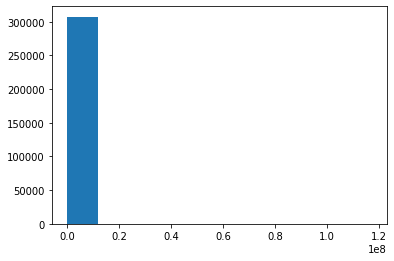

In [5]:
plt.hist(app_train['AMT_INCOME_TOTAL'])

In [6]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [7]:
app_train['AMT_ANNUITY'].describe()


count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

D:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.78916e+05, 1.12480e+05, 1.44110e+04, 1.26800e+03, 3.02000e+02,
        6.10000e+01, 2.20000e+01, 5.00000e+00, 3.30000e+01, 1.00000e+00]),
 array([  1615.5,  27256.5,  52897.5,  78538.5, 104179.5, 129820.5,
        155461.5, 181102.5, 206743.5, 232384.5, 258025.5]),
 <a list of 10 Patch objects>)

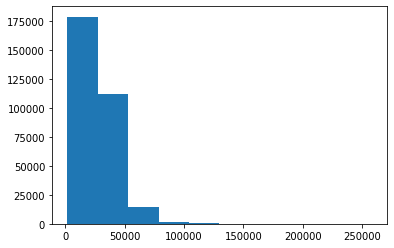

In [8]:
plt.hist(app_train['AMT_ANNUITY'])

(array([1.25018e+05, 1.12767e+05, 4.46440e+04, 1.87860e+04, 4.85000e+03,
        1.03000e+03, 3.73000e+02, 2.30000e+01, 8.00000e+00, 1.20000e+01]),
 array([  45000.,  445500.,  846000., 1246500., 1647000., 2047500.,
        2448000., 2848500., 3249000., 3649500., 4050000.]),
 <a list of 10 Patch objects>)

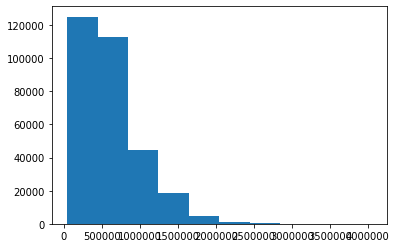

In [9]:
plt.hist(app_train['AMT_CREDIT'])

# 製作以性別為分組，而loans type為x，每年還款為y的分組直方圖

In [10]:
#這邊一定得先groupby之後才可以再用get_group做特徵值提取
gender_type = app_train[['CODE_GENDER','NAME_CONTRACT_TYPE','AMT_ANNUITY']]
gender_type = gender_type.set_index('CODE_GENDER')#將男女轉變為index
gender_type = gender_type.drop(['XNA'])#去除掉特殊值
group = gender_type.groupby(['CODE_GENDER','NAME_CONTRACT_TYPE'])#先分組才能get_group
data_menC = group.get_group(('M','Cash loans'))
data_womenC = group.get_group(('F','Cash loans'))
data_menR = group.get_group(('M','Revolving loans'))
data_womenR = group.get_group(('F','Revolving loans'))


In [14]:
a = data_menC['AMT_ANNUITY'].mean() 
b= data_womenC['AMT_ANNUITY'].mean()
c = data_menR['AMT_ANNUITY'].mean() 
d = data_womenR['AMT_ANNUITY'].mean()
print('a = {a}, b = {b}, c = {c}, d = {d}'.format(a=a,b=b,c=c,d=d))

a = 29747.50671710609, b = 27459.48426353451, c = 17854.74446868183, d = 15562.538171824104


In [17]:
labels = ['Cash loans', 'Revolving loans']
bar1 = [a,c]
bar2 = [b,d]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

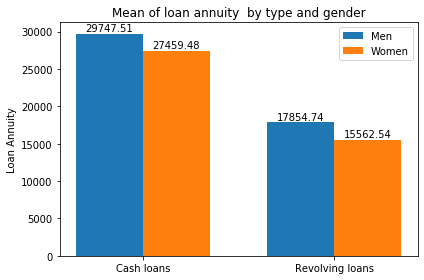

In [18]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, bar1, width, label='Men')
rects2 = ax.bar(x + width/2,bar2, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Loan Annuity')
ax.set_title('Mean of loan annuity  by type and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0.5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()